In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\anant\\Downloads\\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)


In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [6]:
y=df['Exited']
X=df.drop('Exited',axis=1)
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8665

Confusion Matrix:
 [[1551   56]
 [ 211  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [11]:
#intilizing
nn_model=Sequential()
print("neural network initilized!")

neural network initilized!


In [12]:
#ADD INPUT LAYER
inp_layer=Input(shape=(X_train.shape[1],))
nn_model.add(inp_layer)
print("Input layer added! Expects {X_train.shape[1]} feature for sample")

Input layer added! Expects {X_train.shape[1]} feature for sample


In [13]:
#ADD HIDDEN LAYER
hidden_layer = Dense(
kernel_initializer = "random_uniform",
bias_initializer = "random_uniform",
activation = "relu",
units = 15
)
nn_model.add(hidden_layer)
print("first hidden_layer! {15 neurons with relu activaiton} ")

first hidden_layer! {15 neurons with relu activaiton} 


In [14]:
#OUTPUT LAYER
output_layer = Dense(
kernel_initializer = "random_uniform",
bias_initializer = "random_uniform",
activation = "sigmoid",
units = 1
)
nn_model.add(output_layer)
print("first output_layer! {15 neurons with relu activaiton} ")

first output_layer! {15 neurons with relu activaiton} 


In [15]:
nn_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
print("model compile successfully")

model compile successfully


In [16]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196 (784.00 B)

 Trainable params: 196 (784.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_logs=nn_model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=0.1)
print("\n training completed")

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7931 - loss: 0.5832 - val_accuracy: 0.8037 - val_loss: 0.4528
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.4396 - val_accuracy: 0.8400 - val_loss: 0.3940
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8310 - loss: 0.4045 - val_accuracy: 0.8475 - val_loss: 0.3735
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3831 - val_accuracy: 0.8525 - val_loss: 0.3619
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.3692 - val_accuracy: 0.8537 - val_loss: 0.3544
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.3604 - val_accuracy: 0.8537 - val_loss: 0.3497
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3546 - val_accuracy: 0.8525 - val_loss: 0.3472
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3508 - val_accuracy: 0.

In [18]:
#visuvalize data
print(train_logs.history)

{'accuracy': [0.793055534362793, 0.8022222518920898, 0.8309721946716309, 0.8451389074325562, 0.851111114025116, 0.8534722328186035, 0.8563888669013977, 0.8563888669013977, 0.8608333468437195, 0.8597221970558167, 0.8602777719497681, 0.8604166507720947, 0.8609722256660461, 0.8611111044883728, 0.8605555295944214, 0.8602777719497681, 0.8622221946716309, 0.8616666793823242, 0.8612499833106995, 0.8613888621330261, 0.8629166483879089, 0.8620833158493042, 0.862500011920929, 0.8615278005599976, 0.8620833158493042, 0.8620833158493042, 0.8626388907432556, 0.863194465637207, 0.8623611330986023, 0.8615278005599976, 0.8620833158493042, 0.863194465637207, 0.8634722232818604, 0.8611111044883728, 0.8605555295944214, 0.8622221946716309, 0.863194465637207, 0.8626388907432556, 0.8619444370269775, 0.8608333468437195, 0.8634722232818604, 0.8634722232818604, 0.8626388907432556, 0.863194465637207, 0.8620833158493042, 0.8622221946716309, 0.8641666769981384, 0.8619444370269775, 0.8629166483879089, 0.86208331584

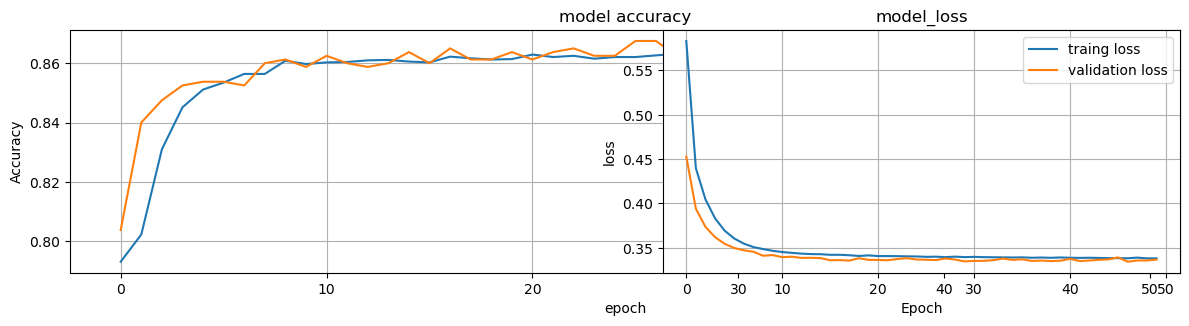

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(train_logs.history['accuracy'],label='training accuracy')
plt.plot(train_logs.history['val_accuracy'],label='validation_accuracy')
plt.title ("model accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(train_logs.history["loss"],label="traing loss")
plt.plot(train_logs.history["val_loss"],label="validation loss")
plt.title("model_loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [20]:
print(X_test)

[[-0.57749609  0.91324755 -0.6557859  ... -1.01960511  1.72572313
  -0.57638802]
 [-0.29729735  0.91324755  0.3900109  ...  0.79888291 -0.57946723
  -0.57638802]
 [-0.52560743 -1.09499335  0.48508334 ... -0.72797953 -0.57946723
   1.73494238]
 ...
 [ 0.81311987 -1.09499335  0.77030065 ... -1.16591585 -0.57946723
  -0.57638802]
 [ 0.41876609  0.91324755 -0.94100321 ... -0.41163463 -0.57946723
  -0.57638802]
 [-0.24540869  0.91324755  0.00972116 ...  0.12593183  1.72572313
  -0.57638802]]


In [21]:
#get probability prediction
y_pred_prob=nn_model(X_test,verbose=False)
print("first 10 probability predicions:")
print(y_pred_prob[:10])

first 10 probability predicions:
tf.Tensor(
[[0.03088516]
 [0.02630872]
 [0.15082707]
 [0.12012091]
 [0.07641421]
 [0.01000581]
 [0.17017132]
 [0.09669274]
 [0.43316254]
 [0.5464625 ]], shape=(10, 1), dtype=float32)


In [22]:
y_pred=tf.cast(y_pred_prob > 0.5,tf.int32)
print("first 10 probability predicions:")
print(y_pred[:10])

first 10 probability predicions:
tf.Tensor(
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]], shape=(10, 1), dtype=int32)


In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8615
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

[[1536   71]
 [ 206  187]]


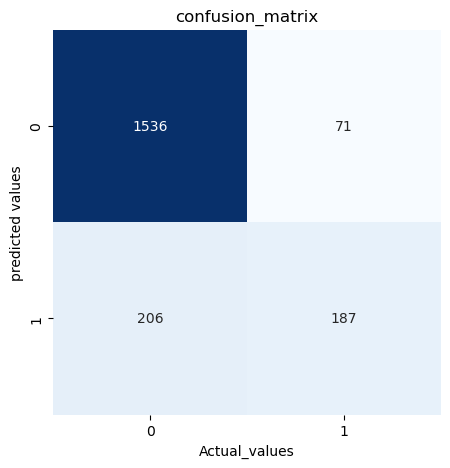

In [24]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title("confusion_matrix")
plt.xlabel("Actual_values")
plt.ylabel("predicted values")
plt.show()
          

In [25]:
#REAL TIME PREDICTION EXAMPLE
new_customer=X.iloc[20:21]
print(new_customer)
new_customer_scaled=scaler.transform(new_customer.values)
prediction_prob=nn_model.predict(new_customer_scaled,verbose=False)
prediction=tf.cast(prediction_prob > 0.5,tf.int32)
print(prediction_prob)
print(f"churn probability: {prediction_prob[0][0]:.4f}({prediction_prob[0][0]*100:.2f}%)")
print(f"final prediction:{"will leave" if prediction[0][0]==1 else"will stay"}")


    CreditScore  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
20          732       1   41       8      0.0              2          1   

    IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  
20               1        170886.17              False            False  


C:\ProgramData\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0.01393219]]
churn probability: 0.0139(1.39%)
final prediction:will stay


In [28]:
#SAVE MODEL FOR FEATURE USE
nn_model.save("bank_churn_model.keras")
print("saved as bank_churn_model.keras")

saved as bank_churn_model.keras


In [29]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import joblib
joblib.dump(scaler,"bank_churn_scaler.pkl")
print("scaler saved as 'bank churn_scaler.pkl'")

scaler saved as 'bank churn_scaler.pkl'


In [31]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib
print("librabries imported successfully")

librabries imported successfully


In [32]:
model=load_model("bank_churn_model.keras")# load and train the model 
print("model loaded sucessfully")
scaler=joblib.load("bank_churn_scaler.pkl")#Load the scaler
print("sclaer loaded successfully")
print("\n model Architecture")#display model architecture
model.summary()


model loaded sucessfully
sclaer loaded successfully

 model Architecture


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 590 (2.31 KB)

 Trainable params: 196 (784.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 394 (1.54 KB)

In [33]:
#preparation sample customer data
sample_customer=pd.DataFrame([
    {'CreditScore':650,
'Age':45,
'Tenure': 5,
'Balance':0,
'NumOfProducts':1,
'HasCrCard':1,
'IsActiveMember':1,
'EstimaresSalary':80000,
'Geography_Germany':0,
'Geography_Spain':1,
'Gender_Male':1
},

    {'CreditScore':600,
'Age':40,
'Tenure': 3,
'Balance':60000,
'NumOfProducts':2,
'HasCrCard':1,
'IsActiveMember':0,
'EstimaresSalary':50000,
'Geography_Germany':1,
'Geography_Spain':0,
'Gender_Male':1
},

    {'CreditScore':800,
'Age':30,
'Tenure': 8,
'Balance':120000,
'NumOfProducts':2,
'HasCrCard':1,
'IsActiveMember':1,
'EstimaresSalary':150000,
'Geography_Germany':0,
'Geography_Spain':0,
'Gender_Male':0
}
])
    
print("sample customer Data:")
print(sample_customer)
    

sample customer Data:
   CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          650   45       5        0              1          1   
1          600   40       3    60000              2          1   
2          800   30       8   120000              2          1   

   IsActiveMember  EstimaresSalary  Geography_Germany  Geography_Spain  \
0               1            80000                  0                1   
1               0            50000                  1                0   
2               1           150000                  0                0   

   Gender_Male  
0            1  
1            1  
2            0  


In [34]:
#SCALE THE NEW DATA
sample_customer_scaled=scaler.transform(sample_customer.values)
print(sample_customer_scaled[0])


[-1.70986091e-02  8.92758474e+01 -3.22274168e+00 -1.73646664e+00
 -1.21845455e+00 -9.16687674e-01  6.49202671e-01  1.60051020e+05
 -1.74616572e+00  1.72572313e+00  1.73494238e+00]


C:\ProgramData\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
#GET PROBABILITY PREDICTIONS
probabilities=model.predict(sample_customer_scaled,verbose=False)
predictions =(probabilities > 0.5).astype("int")

In [36]:
#DISPLAY EACH RESULT 
customer_profiles=[
    "customer 1: medium Risk profile(No Balance, Spain,Age 45)",
    "customer 2:High Risk profile(Inaactive,Germany,Age 40)",
    "customer 3:Low Risk profile (Active, France, Age 30, High Salary)"
]
print("prediction results:\n")
print("-"*60)
for i in range(len(customer_profiles)):
    prob=probabilities[i][0]
    pred=predictions[i][0]
    print(f"\n{customer_profiles[i]}")
    print(f" Churn probability: {prob:.4f}({prob*100:.2f}%)")
    print(f" prediction:{pred} ({'Will leave' if pred == 1 else 'Will STAY'})")
    if prob<0.3:
        Risk="LOW RISK"
    elif prob<0.7:
        Risk="MEDIUM RISK"
    else:
        Risk="HIGH RISK"

    print(F"Risk Level: {Risk}")
    print("-"*60)
    

prediction results:

------------------------------------------------------------

customer 1: medium Risk profile(No Balance, Spain,Age 45)
 Churn probability: 0.0000(0.00%)
 prediction:0 (Will STAY)
Risk Level: LOW RISK
------------------------------------------------------------

customer 2:High Risk profile(Inaactive,Germany,Age 40)
 Churn probability: 0.0000(0.00%)
 prediction:0 (Will STAY)
Risk Level: LOW RISK
------------------------------------------------------------

customer 3:Low Risk profile (Active, France, Age 30, High Salary)
 Churn probability: 0.0000(0.00%)
 prediction:0 (Will STAY)
Risk Level: LOW RISK
------------------------------------------------------------
